In [126]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from preprocess_text import preprocess_text
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib notebook

In [127]:
# get the data
final_dir = r'/Users/ckrasnia/Documents/application_materials/rental_data'
data = pd.read_csv(os.path.join(final_dir,'raw_US_listings.csv'),index_col='Unnamed: 0',dtype = {'id':str, 'host_id':str, })


/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (0,3,22,28,29,41,45,46,54,61,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [142]:
pd.options.display.max_columns=100
data.head()

,id,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,location
0,11464,20210629175854,2021-06-30,Deluxe Studio 5 min. to SC Kaiser & Apple Park,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,https://a0.muscache.com/pictures/121321/2c5a5a...,42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,98%,t,17.0,t,f,"Santa Clara, California, United States",Santa Clara,37.34415,-121.98701,Entire apartment,Entire home/apt,2.0,NaN,1 bath,NaN,0.0,"[""Iron"", ""Cooking basics"", ""Single level home""...",$85.00,4,365.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,t,3.0,3.0,21.0,110,2021-06-30,9.0,3.0,0.0,2018-08-26,2021-02-20,4.44,5.00,4.89,4.89,4.78,4.78,4.67,NaN,t,16.0,16.0,0.0,0.0,0.26,"San Jose, California, United States"
1,21373,20210629175854,2021-06-29,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,https://a0.muscache.com/pictures/527285/0f9d08...,7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within a day,100%,NaN,t,5.0,t,t,"Palo Alto, California, United States",Palo Alto,37.43972,-122.15532,Private room in villa,Private room,1.0,NaN,2 shared baths,1.0,1.0,"[""Iron"", ""Cooking basics"", ""Shampoo"", ""Smoke a...",$80.00,2,730.0,2.0,2.0,730.0,730.0,2.0,730.0,t,0.0,0.0,0.0,119,2021-06-29,264.0,0.0,0.0,2018-04-13,2020-03-14,4.86,4.82,4.79,4.85,4.89,4.96,4.75,NaN,f,4.0,0.0,4.0,0.0,6.75,"San Jose, California, United States"
2,37512,20210629175854,2021-06-30,Private room - Parking 3 carport,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,https://a0.muscache.com/pictures/47698055/32c3...,161741,Maria,2010-07-09,"San Jose, California, United States",I am in a committed relationship with my live...,NaN,NaN,NaN,t,2.0,t,t,"San Jose, California, United States",San Jose,37.30423,-121.84088,Private room in bungalow,Private room,2.0,NaN,1 shared bath,1.0,2.0,"[""Iron"", ""Shampoo"", ""Smoke alarm"", ""Washer"", ""...",$48.00,1,365.0,1.0,1.0,365.0,365.0,1.0,365.0,t,0.0,0.0,0.0,121,2021-06-30,183.0,0.0,0.0,2015-04-01,2017-03-14,4.69,4.73,4.76,4.90,4.83,4.48,4.70,NaN,f,2.0,0.0,2.0,0.0,2.40,"San Jose, California, United States"
3,52786,20210629175854,2021-06-30,Cozy Room in A Quiet Community,"We live in a safe, quiet community close to pu...",Our community is a safe environment and at nig...,https://a0.muscache.com/pictures/69d7186b-976b...,161741,Maria,2010-07-09,"San Jose, California, United States",I am in a committed relationship with my live...,NaN,NaN,NaN,t,2.0,t,t,"San Jose, California, United States",San Jose,37.30521,-121.84149,Private room in bungalow,Private room,2.0,NaN,1 shared bath,1.0,1.0,"[""Iron"", ""Cooking basics"", ""Barbecu

In [128]:
print(len(data))
y = 30-data['availability_30']
data.groupby('location').count() # wide range of number of listings per area, could be a wee bit of an issue...

498225


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
location,,,,,,,,,,,,,,,,,,,,,
"Asheville, North Carolina, United States",7555,7555,7555,7555,7555,7545,5891,7555,7555,7555,...,7092,7092,7092,0,7555,7555,7555,7555,7555,7099
"Austin, Texas, United States",32228,32228,32228,32228,32228,31575,19884,32225,32228,32228,...,24426,24418,24418,0,32228,32228,32228,32228,32228,24705
"Boston, Massachusetts, United States",9509,9509,9509,9509,9509,9413,6326,9509,9509,9509,...,6796,6790,6790,5202,9509,9509,9509,9509,9509,6832
"Cambridge, Massachusetts, United States",2414,2414,2414,2414,2414,2366,1622,2414,2414,2414,...,1746,1746,1746,800,2414,2414,2414,2414,2414,1759
"Chicago, Illinois, United States",19334,19334,19334,19334,19334,19287,14058,19334,19334,19334,...,15952,15955,15955,18085,19334,19334,19334,19334,19334,16057
"Columbus, Ohio, United States",2913,2913,2913,2913,2913,2902,2162,2913,2913,2913,...,2575,2575,2575,2593,2913,2913,2913,2913,2913,2575
"Denver, Colorado, United States",11563,11563,11563,11563,11563,11464,8549,11563,11563,11563,...,9617,9617,9617,7627,11563,11563,11563,11563,11563,9631
"Fort Lauderdale, Florida, United States",12531,12531,12531,12531,12531,12100,7900,12531,12531,12531,...,9981,9980,9980,4,12531,12531,12531,12531,12531,10035
"Jersey City, New Jersey, United States",1888,1888,1888,1888,1888,1841,1214,1888,1888,1888,...,1378,1378,1378,69,1888,1888,1888,1888,1888,1386


In [129]:

def get_bathrooms(list):
    """
    extractsr the numbers from a list of strings, specialized to the bathroom_text column
    Input : list of strings
    output : float of number of bathrooms
    """
    for item in list:
        if any([i.isnumeric() for i in item]):
            return float(item)
        elif 'half' in item.lower():
            return .5
        else:
            return np.nan

def cut_to_len(array,length):
    a_len=len(array)
    if a_len > length:
        return array[:length]
    else:
        return np.concatenate([array,np.zeros(length-a_len).astype(int)])


In [130]:
data.keys()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [131]:

# now I have the data, and I want to clean it up a bit, first I'll drop some columns I wont need
# dropping some useless info, some with duplicate data, and some that have very low variance, ie >90% the same value
data['neighbourhood_group_cleansed'][data['neighbourhood_group_cleansed'].isna()] = data['neighbourhood_cleansed'][data['neighbourhood_group_cleansed'].isna()]
drop_columns = ['listing_url','host_url','host_thumbnail_url','host_picture_url',
                'host_neighbourhood','host_total_listings_count', 'host_verifications', 
                'neighbourhood_cleansed','calendar_updated']
data=data.drop(drop_columns,axis=1)

/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


OK so the next goal is to make a regression model trying to predict the total income from a 
rental given its characteristics. So to do this I will do a few things, I will turn some 
currently non-numeric values into numeric, and I will normalize all the data into the range 0-1 
so we can easily compare the weights of the model

0            1 bath
1    2 shared baths
2     1 shared bath
3     1 shared bath
4    2 shared baths
Name: bathrooms_text, dtype: object 0    1.0
1    1.0
2    0.5
3    0.5
4    1.0
Name: bathrooms_text, dtype: float64


<IPython.core.display.Javascript object>


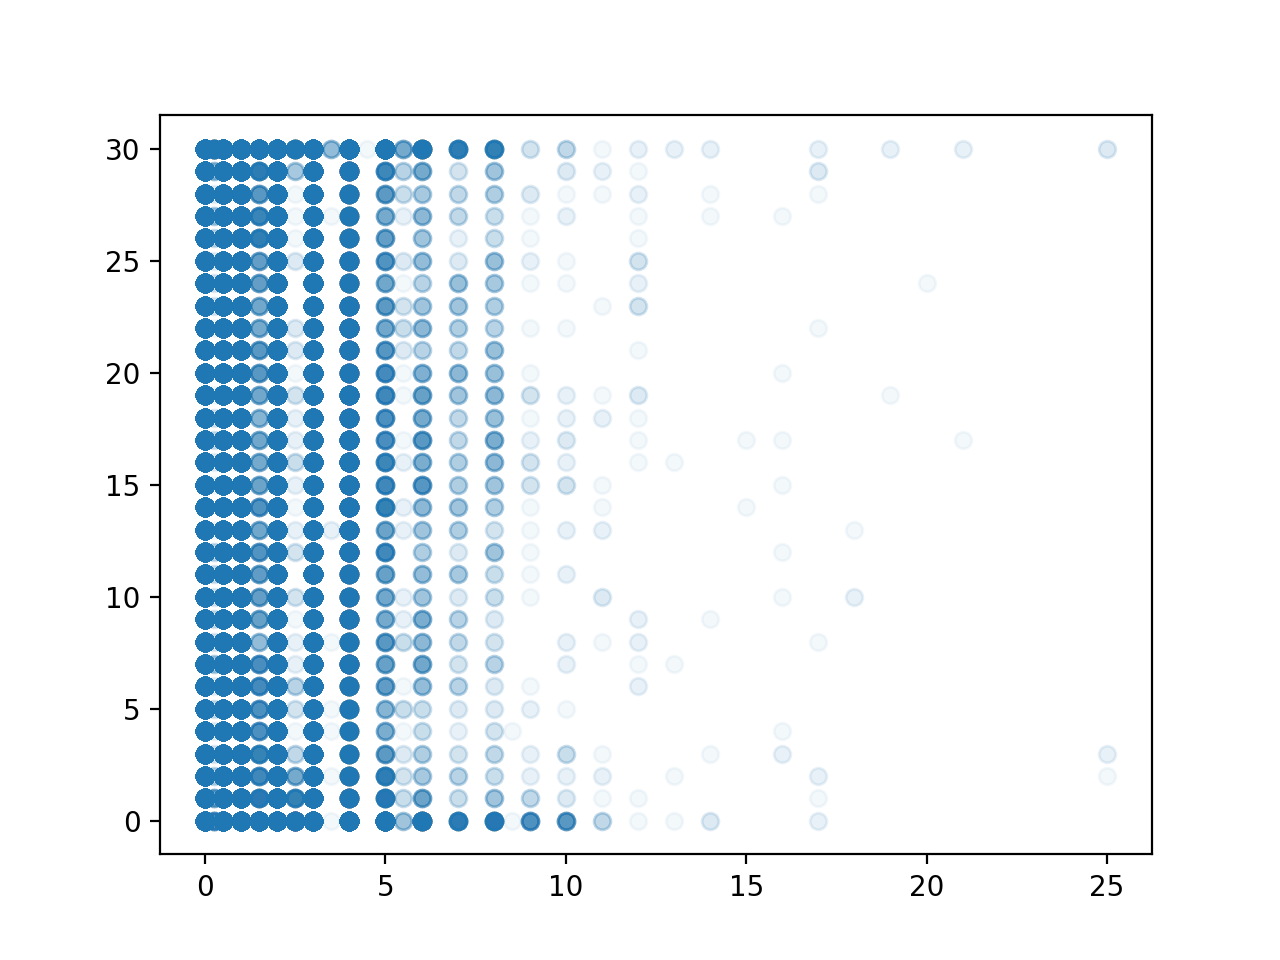

In [132]:
# first convert some values to numeric
# getting the bathroom count
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin

class BathroomParser(BaseEstimator, TransformerMixin):
    
    @staticmethod
    def get_bathrooms(string):
        """
        extractsr the numbers from a list of strings, specialized to the bathroom_text column
        Input : list of strings
        output : float of number of bathrooms
        """
        try:
            if np.isnan(string):
                return np.nan
        except TypeError:
            pass
        multiplier = 1 # if bathrooms are shared, I cut the count in half
        count = 0
        if string.strip().lower() == 'private':
            return 1
        if string.strip().lower() == 'shared':
            return .5
        for item in string.split():
            
            if item.isnumeric():
                count += float(item)
                
            if 'half' in item.lower():
                count += .5
                
            # if bathrooms are shared, I cut the count in half
            if 'shared' in item.lower():
                multiplier = .5
            
        return count * multiplier
            
        
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        return X.apply(BathroomParser.get_bathrooms)

# test BathroomParser
print(data['bathrooms_text'].head(),BathroomParser().fit_transform(data['bathrooms_text']).head())
plt.figure()
plt.scatter(BathroomParser().fit_transform(data['bathrooms_text']),y,alpha=.05)

In [133]:
y.shape

(498225,)

In [134]:
# pd.Series(np.ones(10)*np.nan).str.isnumeric()
len(data['price'][data['price'].str.isnumeric().isna()])
X[~X.str.isnumeric()].isna().sum()

0

In [135]:
X = data['price'].astype(str)

0     $85.00
1     $80.00
2     $48.00
3     $50.00
4    $100.00
Name: price, dtype: object
0     85.0
1     80.0
2     48.0
3     50.0
4    100.0
Name: price, dtype: float64


/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


<IPython.core.display.Javascript object>


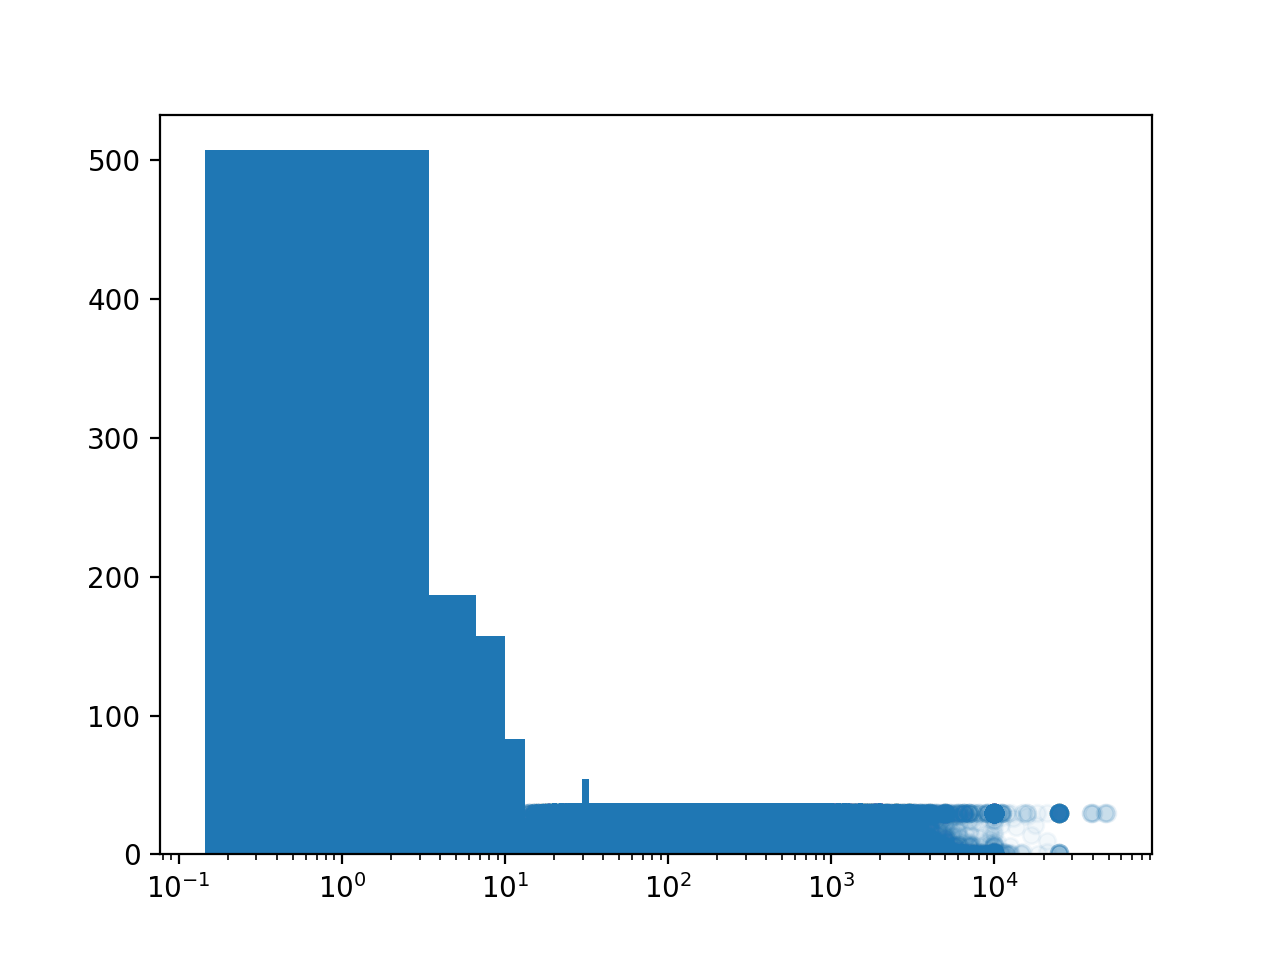

[None]

In [136]:
## work on prices
class PriceFixer(BaseEstimator, TransformerMixin):
    
        
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # only change the values that are not numeric and not nan
        X=X.astype(str)
        X[~X.str.isnumeric()] = X.str.replace(",","").str.replace('$','')
        return X.astype(float)
x=PriceFixer().fit_transform(data['price'])

print(data['price'].head())
print(x.head())
fig,ax=plt.subplots()
ax.scatter(x,y,alpha=.05)
# a, b = np.polyfit(x, y, 1)
# plt.plot(np.linspace(min(x),max(x),100),a*np.linspace(min(x),max(x),100)+b)
ax.set(xscale='log')

In [137]:

# there are a couple boolean columns coded as "t" and "f", replace those with 1, 0
class BoolMapper(BaseEstimator, TransformerMixin):
    
        
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # only change the values that are not numeric and not nan
        boolean_mapper = {'t' : 1., 'f' : 0.}
        X=X.map(boolean_mapper, na_action="ignore")
        return X.astype(float)
    
# boolean_mapper = {'t' : 1, 'f' : 0}
bools = ['instant_bookable','has_availability', 'host_has_profile_pic',
         'host_identity_verified', 'host_is_superhost']

for column in bools:
    x = BoolMapper().fit_transform(data[column])
    print(x.dtype)
    print(np.unique(x[x.notna()]))


float64
[0. 1.]
float64
[0. 1.]
float64
[0. 1.]
float64
[0. 1.]
float64
[0. 1.]


In [182]:

data['room_type'].name

'room_type'

In [187]:
# categorize room types
## switch to one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
class OHEfromDF(BaseEstimator, TransformerMixin):
    """
    Transformer class that formats pandas columns with string values into a valid input for the
    DictVectorizer function to create a one-hot encoding.
    
    params : vals (None or list)
                The values to use for one-hot encoding, they can either be fed in at intitialization or 
                fit by taking all the values that are more common than len(X)/val_cutoff
           : val_cutoff (float) the number >1 to use to select the vals in the fit method as described above.
                val_cutoff=1 means select all values, larger number provides a stricter cutoff
    """
    def __init__(self,vals=None,val_cutoff=100):
        self.vals = vals
        self.val_cutoff=100
        
    def fit(self, X, y=None):
        # can either provide value, or, can fit them based on the most common entries
        if self.vals == None:
            self.vals = list(X.value_counts()[X.value_counts()>len(data)/self.val_cutoff].index)

        return self
    
    def transform(self, X):
        # only change the values that are not numeric and not nan
        mapper = {val:i for i,val in enumerate(self.vals)}
#         print(mapper)
        X = X.map(mapper, na_action="ignore")
        col_names = [X.name+'_'+val for val in self.vals]
        new_X = pd.DataFrame(columns=col_names)
        for i,name in enumerate(col_names):
            new_X[name] = X==i
        return new_X.astype(float)

ToDictVector(vals = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']).fit_transform(data['room_type'])
# rt_mapper = {'Entire home/apt' : 3, 'Private room' : 2, 'Hotel room' : 1}
# data['room_type'] = data['room_type'].map(rt_mapper)
# # the nan room types are shared, so assign these to 0
# data['room_type'][data['room_type'].isna()] = 0
# # I think I want to have this one-hot instead, so going to add that here
# data['room_type_entire'] = data['room_type'].map({3:1, 2:0, 1:0, 0:0})
# data['room_type_private'] = data['room_type'].map({2:1, 3:0, 1:0, 0:0})
# data['room_type_hotel'] = data['room_type'].map({1:1, 3:0, 2:0, 0:0})
# data['room_type_none'] = data['room_type'].map({0:1, 3:0, 2:0, 1:0})

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_Hotel room
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
38272,0.0,1.0,0.0,0.0
38273,0.0,1.0,0.0,0.0
38274,0.0,1.0,0.0,0.0
38275,0.0,1.0,0.0,0.0


One of the limitations of this dataset is that we don't know when listings are actually rented versus made unavailable by the host. One thing I can probably do is try to find listings that are only occasionally made available by the host. This is assuming that there are two main categories of listings, some that are regularly available for rent, and some that a host will only make available when they are not at their home, I think we want to exclude the last ones. To get at this I will use the `availability_365` column, with the assumption that properties that are never or hardly available, and those that are always available, are probably not going to be too informative for our model.

<IPython.core.display.Javascript object>


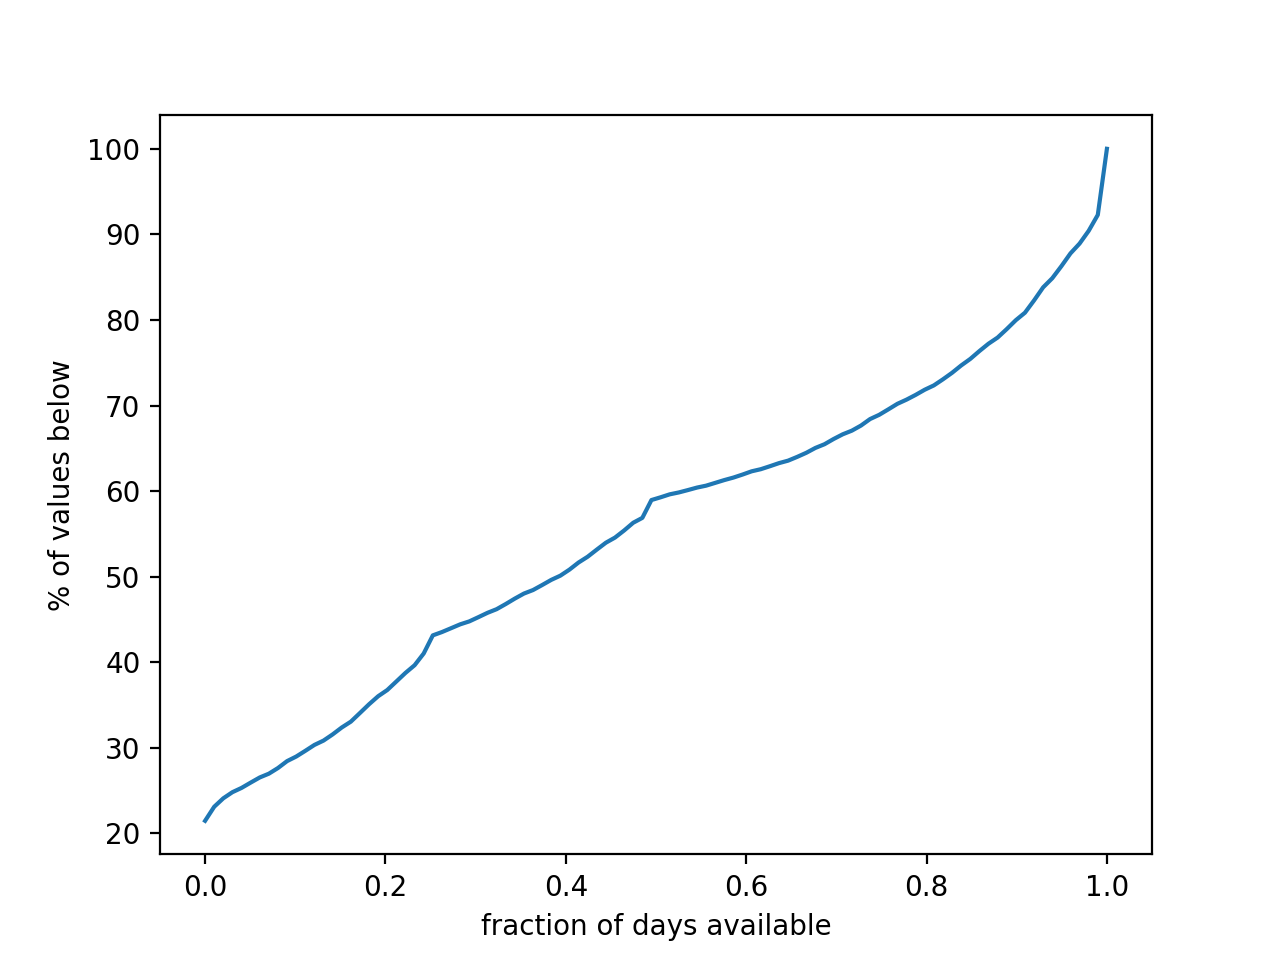

[Text(0, 0.5, '% of values below'), Text(0.5, 0, 'fraction of days available')]

In [41]:
# take a look at how many properties would be dropped if we excluded at different cutoffs of this column
out=[]
for i in np.linspace(0,1,100):
    out.append((data['availability_365']<=i).sum())
fig,ax=plt.subplots()
plt.plot(np.linspace(0,1,100),np.array(out)/len(data)*100)
ax.set(ylabel='% of values below',xlabel='fraction of days available')

In [200]:
# there seems to be some erroneous entries here that we need to remove

class FilterOutFakes(BaseEstimator, TransformerMixin):
    """
    transformer to filter our the properties that have 0 availability over the next year, they probably
    aren't going to be useful to train on
    
    Input : pd.DataFrame with the column 'availability_365'
    
    param cutoff: the integer value from 0-365 used to exclude listings. the excludion works as:
                    availability_365 > cutoff
    """
    
    def __init__(self, max = 365,min=0):
        self.max = max
        self.min = min
        
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        vals=pd.to_numeric(X['availability_365'],errors='coerce')
        return X[(vals > self.min) & (vals <= self.max)]

print(len(data))
len(FilterOutFakes(min=14,max=365).fit_transform(data))


# list365=np.zeros(len(data['availability_365']))
# for i,val in enumerate(data['availability_365']):
#     try: 
#         list365[i] = float(val)/365
#     except:
#         list365[i] = np.nan
# data['availability_365'] = list365.astype(float)


498225


372094

In [246]:
! pip install ediblepickle

  Preparing metadata (setup.py) ... done
  Created wheel for ediblepickle: filename=ediblepickle-1.1.3-py3-none-any.whl size=7549 sha256=d9b0a2f470a4b1d8f4fa79523ef1b2d7bad694236b2a58b7f8a88dc6b52144f1
  Stored in directory: /Users/ckrasnia/Library/Caches/pip/wheels/f0/15/25/9f24a1d5be5e8bb84150595602d1d706cefb2deb0716f5447c
Successfully built ediblepickle


In [312]:
import requests
import haversine as hs
from ediblepickle import checkpoint
import os
from urllib.parse import quote

cache_dir = 'cache'
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

@checkpoint(key=lambda args, kwargs: quote(args[0]) + '.pkl', work_dir=cache_dir)
def get_lat_long(address):
    params = { 'format'        :'json', 
               'addressdetails': 1, 
               'q'             : address}
    headers = { 'user-agent'   : 'TDI' }   #  Need to supply a user agent other than the default provided 
                                           #  by requests for the API to accept the query.
    response = requests.get('http://nominatim.openstreetmap.org/search', 
                        params=params, headers=headers)
    try:
        lat = response.json()[0]['lat']
        long = response.json()[0]['lon']
    except IndexError:
        print(f'No location on openstreetmap found for {address}, returning nan')
        return (np.nan, np.nan)
    return (float(lat),float(long))

class DistFromCenter(BaseEstimator, TransformerMixin):
    """
    transformer to get the distance from the neighborhood center of the listing. If there is no neighborhood,
    it uses the city center. This takes a long time, but I have to iterate through them individually to keep 
    from pinging the API too many times at once and to check if I can use the neighbourhood or have to use 
    the city
    
    """
      
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        loc1 = [(x,y) for x,y in zip(X['latitude'],X['longitude'])]
        dist = np.ones(len(X))*np.nan
        
        # this is required to keep the cache from creating a new directory when there is something like Cambridge/Boston
        X['neighbourhood'] = X['neighbourhood'].str.replace('/',' ')
        for i, l1 in enumerate(tqdm(loc1)):
            l2 = (np.nan,np.nan)
            # first get neighborhood lat,long
            if type(X['neighbourhood'].iloc[i]) == str:
                l2 = get_lat_long(X['neighbourhood'].iloc[i])
            
            #if l2 is nan or if the neighbourhood is nan, use the city instead
            if (X['neighbourhood'].isna().iloc[i]) | any(map(np.isnan,l2)):
                if X['location'].isna().iloc[i]:
                    # if both location and neighborhood are nan, return something really far away, so that the distance
                    # will be really far and return nan in the end
                    l2 = get_lat_long('Beijing, China')
                else:
                    l2 = get_lat_long(X['location'].iloc[i])
                
            dist[i] = hs.haversine(l1,l2)
            # if the distance is outrageous, set it to nan
            if dist[i] >= 1000:
                dist[i] = np.nan
                
        return dist

In [313]:
# hs.haversine(geocode('Santa Clara, California, United States'),(37.34415,-121.98701))
data[['latitude','longitude','neighbourhood']].head(20)
data['location'].iloc[27200+52478]

nan

In [314]:
DistFromCenter().fit_transform(data[27200+52478:])

/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  5%|█▊                                | 22591/418547 [06:33<5:53:38, 18.66it/s]

No location on openstreetmap found for El Chorro, Departamento de Maldonado, Uruguay, returning nan


 10%|███▍                              | 41701/418547 [12:02<6:03:31, 17.28it/s]

No location on openstreetmap found for Sunnyvalle, California, United States, returning nan


 16%|█████▎                            | 65426/418547 [18:56<3:49:33, 25.64it/s]

No location on openstreetmap found for SUNNYSID, LONG ISLAND CITY, New York, United States, returning nan


 16%|█████▍                            | 66861/418547 [19:34<3:56:23, 24.80it/s]

No location on openstreetmap found for Jackson  hights , New York, United States, returning nan


 16%|█████▍                            | 67457/418547 [19:48<5:28:18, 17.82it/s]

No location on openstreetmap found for Brooklyn, Northern Mariana Islands, United States, returning nan


 16%|█████▍                            | 67664/418547 [19:53<6:10:17, 15.79it/s]

No location on openstreetmap found for Flushing  Kew Gardens Hills, New York, United States, returning nan


 18%|██████                            | 74775/418547 [22:25<8:46:20, 10.89it/s]

No location on openstreetmap found for Brookly , New York, United States, returning nan


 19%|██████▎                           | 77771/418547 [23:25<6:23:22, 14.81it/s]

No location on openstreetmap found for East Elmhurst or Flushing , New York, United States, returning nan


 19%|██████▍                           | 78898/418547 [23:48<5:04:42, 18.58it/s]

No location on openstreetmap found for Flushing or east Elmhurst , New York, United States, returning nan


 20%|██████▋                           | 81637/418547 [24:42<5:01:33, 18.62it/s]

No location on openstreetmap found for Rosedale, Jamaica, New York, United States, returning nan


 21%|██████▉                          | 87534/418547 [26:35<10:35:53,  8.68it/s]

No location on openstreetmap found for Broklyn , New York, United States, returning nan


 21%|███████▏                          | 88445/418547 [26:54<6:25:35, 14.27it/s]

No location on openstreetmap found for North Bronx (Wakefield), New York, United States, returning nan


 22%|███████▎                          | 90767/418547 [27:39<4:17:24, 21.22it/s]

No location on openstreetmap found for ニュー・ヨーク, New York, United States, returning nan


 35%|███████████▌                     | 146792/418547 [43:53<8:07:55,  9.28it/s]

No location on openstreetmap found for Denmark Twp, Minnesota, United States, returning nan


 36%|███████████▋                     | 148612/418547 [45:24<3:17:47, 22.74it/s]

No location on openstreetmap found for Saint ANTHNY VLG, Minnesota, United States, returning nan


 37%|████████████                     | 152817/418547 [46:56<2:56:23, 25.11it/s]

No location on openstreetmap found for 泽西城, New Jersey, United States, returning nan


 48%|███████████████▋                 | 198843/418547 [59:34<2:10:41, 28.02it/s]

No location on openstreetmap found for Lower Hominy, North Carolina, United States, returning nan


 59%|██████████████████▎            | 246807/418547 [1:13:16<4:21:34, 10.94it/s]

No location on openstreetmap found for Flush, New York, United States, returning nan


 67%|████████████████████▊          | 280247/418547 [1:23:06<1:40:57, 22.83it/s]

No location on openstreetmap found for lauderdale by the sea beach, Florida, United States, returning nan


 68%|████████████████████▉          | 283321/418547 [1:24:04<2:24:38, 15.58it/s]

No location on openstreetmap found for LAUD BY SEA, Florida, United States, returning nan


 68%|█████████████████████          | 283811/418547 [1:24:15<1:54:43, 19.57it/s]

No location on openstreetmap found for Hollywod Beach, Florida, United States, returning nan


 90%|█████████████████████████████▋   | 377203/418547 [1:50:07<29:58, 22.99it/s]

No location on openstreetmap found for San Franscisco, California, United States, returning nan


100%|█████████████████████████████████| 418547/418547 [2:02:00<00:00, 57.17it/s]


array([        nan,         nan, 13.48647229, ...,  5.05516158,
        5.17644712,  5.38638003])

In [337]:
from datetime import datetime
class TimeDelta(BaseEstimator, TransformerMixin):
    """
    calculate the time of a date since AirBnB was founded in days
    
    """
      
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        #calculate time delta since airbnb was founded

        return (pd.to_datetime(X,errors='coerce') - pd.to_datetime('2008, 8, 1')).dt.days

In [338]:

TimeDelta().fit_transform(data['host_since'])

0         425.0
1         176.0
2         707.0
3         707.0
4         176.0
          ...  
38272    3000.0
38273    3000.0
38274    4221.0
38275    4221.0
38276    2762.0
Name: host_since, Length: 498225, dtype: float64

In [229]:
data.head(20)

,id,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,location
0,11464,20210629175854,2021-06-30,Deluxe Studio 5 min. to SC Kaiser & Apple Park,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,https://a0.muscache.com/pictures/121321/2c5a5a...,42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,98%,t,17.0,t,f,"Santa Clara, California, United States",Santa Clara,37.34415,-121.98701,Entire apartment,Entire home/apt,2.0,NaN,1 bath,NaN,0.0,"[""Iron"", ""Cooking basics"", ""Single level home""...",$85.00,4,365.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,t,3.0,3.0,21.0,110,2021-06-30,9.0,3.0,0.0,2018-08-26,2021-02-20,4.44,5.00,4.89,4.89,4.78,4.78,4.67,NaN,t,16.0,16.0,0.0,0.0,0.26,"San Jose, California, United States"
1,21373,20210629175854,2021-06-29,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,https://a0.muscache.com/pictures/527285/0f9d08...,7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within a day,100%,NaN,t,5.0,t,t,"Palo Alto, California, United States",Palo Alto,37.43972,-122.15532,Private room in villa,Private room,1.0,NaN,2 shared baths,1.0,1.0,"[""Iron"", ""Cooking basics"", ""Shampoo"", ""Smoke a...",$80.00,2,730.0,2.0,2.0,730.0,730.0,2.0,730.0,t,0.0,0.0,0.0,119,2021-06-29,264.0,0.0,0.0,2018-04-13,2020-03-14,4.86,4.82,4.79,4.85,4.89,4.96,4.75,NaN,f,4.0,0.0,4.0,0.0,6.75,"San Jose, California, United States"
2,37512,20210629175854,2021-06-30,Private room - Parking 3 carport,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,https://a0.muscache.com/pictures/47698055/32c3...,161741,Maria,2010-07-09,"San Jose, California, United States",I am in a committed relationship with my live...,NaN,NaN,NaN,t,2.0,t,t,"San Jose, California, United States",San Jose,37.30423,-121.84088,Private room in bungalow,Private room,2.0,NaN,1 shared bath,1.0,2.0,"[""Iron"", ""Shampoo"", ""Smoke alarm"", ""Washer"", ""...",$48.00,1,365.0,1.0,1.0,365.0,365.0,1.0,365.0,t,0.0,0.0,0.0,121,2021-06-30,183.0,0.0,0.0,2015-04-01,2017-03-14,4.69,4.73,4.76,4.90,4.83,4.48,4.70,NaN,f,2.0,0.0,2.0,0.0,2.40,"San Jose, California, United States"
3,52786,20210629175854,2021-06-30,Cozy Room in A Quiet Community,"We live in a safe, quiet community close to pu...",Our community is a safe environment and at nig...,https://a0.muscache.com/pictures/69d7186b-976b...,161741,Maria,2010-07-09,"San Jose, California, United States",I am in a committed relationship with my live...,NaN,NaN,NaN,t,2.0,t,t,"San Jose, California, United States",San Jose,37.30521,-121.84149,Private room in bungalow,Private room,2.0,NaN,1 shared bath,1.0,1.0,"[""Iron"", ""Cooking basics"", ""Barbecu

Looks like ~20 of properties are never available, not so many are always available, but I think it is still worth excluding either end of this graph, I would think <=7/365 and >=358/365 (one week available or only one week booked) should be excluded

In [46]:
use_columns = ['host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
               'host_identity_verified','accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
               'minimum_nights', 'maximum_nights','availability_30', 'number_of_reviews',
               'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
               'review_scores_location', 'review_scores_value', 'instant_bookable',
               'calculated_host_listings_count','reviews_per_month', 'has_availability', 'id', 
               'room_type_none', 'room_type_hotel', 'room_type_private', 'room_type_entire'] # dont want , 'id' if not using groupby

numeric_data = data[use_columns]
# try skipping the groupby to treat each data point independently
numeric_data = numeric_data.groupby('id').mean()

# look to see how often things changed, this should be easy in the columns that are boolean
for col in bools:
    print(col)
    print(np.unique(numeric_data[col],return_counts=True))

instant_bookable
(array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]), array([94574,  1946,  3125,  2265, 64536]))
has_availability
(array([0.        , 0.5       , 0.66666667, 1.        ]), array([     1,      2,      3, 166440]))
host_has_profile_pic
(array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ,
              nan]), array([   972,     17,     36,     15, 165141,    265]))
host_identity_verified
(array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ,
              nan]), array([ 26582,    588,    615,    622, 137774,    265]))
host_is_superhost
(array([0.        , 0.2       , 0.33333333, 0.5       , 0.66666667,
       1.        ,        nan]), array([98987,     1,  5033,  5439,  5166, 51555,   265]))


ok there's some interesting stuff here, it looks like there are a reasonable number of times that 
a listing switched between values of being instant_bookable and from having a superhost or not,
should remember this for the future as we could do some interesting experiments to see how these
changes affected the income for that listing
Another interesting tidbit from here is that many of these columns have the same number (265) of 
nans, thats pretty small and if the same listings have a bunch of nans they won't be very helpful
anyway so we can probably drop those

In [49]:
numeric_data = data[use_columns]
# look more at where there are nans
for col in numeric_data.columns:
    print('fraction nans in {} : {:1.3f}%'.format(col,np.sum(numeric_data[col].isna())/len(numeric_data)*100))
    

fraction nans in host_is_superhost : 0.256%
fraction nans in host_listings_count : 0.256%
fraction nans in host_has_profile_pic : 0.256%
fraction nans in host_identity_verified : 0.256%
fraction nans in accommodates : 0.000%
fraction nans in bathrooms : 0.159%
fraction nans in bedrooms : 9.755%
fraction nans in beds : 1.905%
fraction nans in price : 0.000%
fraction nans in minimum_nights : 0.000%
fraction nans in maximum_nights : 0.000%
fraction nans in availability_30 : 0.000%
fraction nans in number_of_reviews : 0.000%
fraction nans in number_of_reviews_ltm : 0.000%
fraction nans in review_scores_rating : 16.622%
fraction nans in review_scores_accuracy : 16.953%
fraction nans in review_scores_cleanliness : 16.952%
fraction nans in review_scores_checkin : 16.960%
fraction nans in review_scores_communication : 16.955%
fraction nans in review_scores_location : 16.960%
fraction nans in review_scores_value : 16.961%
fraction nans in instant_bookable : 0.000%
fraction nans in calculated_ho

Ok we have a few things here, some are easy to fix, others not so much. For those with no host 
information we can easily drop that .3% of data and be fine. The first problem is in the number 
of bedrooms whih is ~10% nan. I think this might be from listings that are a single private room
so the host doesn't bother to put a bedroom count on there, this should be pretty easy to fix. 
the number of beds we also might be able to infer on, but that is only 2% of data so wouldn't be
too bad throwing that away. The bigger issue is how to treat not having any reviews. Seems like
~16% of listings have no reviews, so dealing with that could be tricky. I definitely want to 
include review data as it is probably pretty influential, might just try setting NaN to a review
score of 0 and see how that goes. For future it'll be an important thing to compare, also if there is an algorithm that can handle NaN values, that would probably be best


In [50]:
# start by giving the listings with no reviews a review of 0
reviews = ['number_of_reviews','number_of_reviews_ltm', 'review_scores_value', 'reviews_per_month',
           'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location', 'review_scores_rating']
for review in reviews:
    numeric_data[review][numeric_data[review].isna()] = 0     

for col in numeric_data.columns:
    print('fraction nans in {} : {:1.3f}%'.format(col,np.sum(numeric_data[col].isna())/len(numeric_data)*100))

fraction nans in host_is_superhost : 0.256%
fraction nans in host_listings_count : 0.256%
fraction nans in host_has_profile_pic : 0.256%
fraction nans in host_identity_verified : 0.256%
fraction nans in accommodates : 0.000%
fraction nans in bathrooms : 0.159%
fraction nans in bedrooms : 9.755%
fraction nans in beds : 1.905%
fraction nans in price : 0.000%
fraction nans in minimum_nights : 0.000%
fraction nans in maximum_nights : 0.000%
fraction nans in availability_30 : 0.000%
fraction nans in number_of_reviews : 0.000%
fraction nans in number_of_reviews_ltm : 0.000%
fraction nans in review_scores_rating : 0.000%
fraction nans in review_scores_accuracy : 0.000%
fraction nans in review_scores_cleanliness : 0.000%
fraction nans in review_scores_checkin : 0.000%
fraction nans in review_scores_communication : 0.000%
fraction nans in review_scores_location : 0.000%
fraction nans in review_scores_value : 0.000%
fraction nans in instant_bookable : 0.000%
fraction nans in calculated_host_list

/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [52]:
# lets see how to deal with the 10% of listings with no bedroom count
numeric_data[numeric_data['bedrooms'].isna()].describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,maximum_nights,availability_30,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,has_availability,room_type_none,room_type_hotel,room_type_private,room_type_entire
count,32136.000000,32136.000000,32136.000000,32227.000000,32190.000000,0.0,31090.000000,32227.000000,32227.000000,32227.000000,...,32227.000000,32227.000000,32227.000000,32227.000000,32227.000000,32227.0,32227.0,32227.000000,32227.000000,32227.000000
mean,0.367532,0.996826,0.836787,2.564496,1.018391,NaN,1.301930,154.339219,602.608682,9.904645,...,3.946280,3.822364,0.454184,26.378378,2.636311,1.0,0.0,0.007944,0.119217,0.872840
std,0.482140,0.056250,0.369565,1.239099,0.348375,NaN,0.705793,836.231548,506.010010,9.834824,...,1.876729,1.837414,0.497904,53.581394,6.301169,0.0,0.0,0.088774,0.324048,0.333158
min,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,10.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,1.000000,84.000000,32.500000,0.000000,...,4.500000,4.170000,0.000000,1.000000,0.160000,1.0,0.0,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,1.000000,109.000000,365.000000,7.000000,...,4.870000,4.710000,0.000000,3.000000,1.070000,1.0,0.0,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,3.000000,1.000000,NaN,2.000000,149.000000,1125.000000,17.000000,...,4.980000,4.880000,1.000000,23.000000,3.320000,1.0,0.0,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,16.000000,16.000000,NaN,12.000000,48864.000000,1125.000000,30.000000,...,5.000000,5.000000,1.000000,421.000000,362.000000,1.0,0.0,1.000000,1.000000,1.000000


looks like these are really all over the place unfortunately... I think the most reasonable thing
to do here is to calculate the mean number of bedrooms there are per the number of beds listed. 
because only 3% of the data has no beds

In [53]:
# need to take the reciprical of what I actually want to avoid the devide by zero issue for 0 beds
bedrooms_per_beds = 1 / (numeric_data[~numeric_data['bedrooms'].isna()]['beds'] \
    / numeric_data[~numeric_data['bedrooms'].isna()]['bedrooms']).mean()

numeric_data['bedrooms'][numeric_data['bedrooms'].isna()] = \
    numeric_data['beds'][numeric_data['bedrooms'].isna()] * bedrooms_per_beds

numeric_data = (numeric_data.drop(use_columns, axis=1)
         .join(numeric_data[use_columns].apply(pd.to_numeric, errors='coerce')))

/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
# check nans again
for col in numeric_data.columns:
    print('fraction nans in {} : {:1.3f}%'.format(col,np.sum(numeric_data[col].isna())/len(numeric_data)*100))

fraction nans in host_is_superhost : 0.249%
fraction nans in host_listings_count : 0.249%
fraction nans in host_has_profile_pic : 0.249%
fraction nans in host_identity_verified : 0.249%
fraction nans in accommodates : 0.000%
fraction nans in bathrooms : 0.193%
fraction nans in bedrooms : 0.219%
fraction nans in beds : 1.168%
fraction nans in price : 0.000%
fraction nans in minimum_nights : 0.000%
fraction nans in maximum_nights : 0.000%
fraction nans in availability_30 : 0.000%
fraction nans in number_of_reviews : 0.000%
fraction nans in number_of_reviews_ltm : 0.000%
fraction nans in review_scores_rating : 0.000%
fraction nans in review_scores_accuracy : 0.000%
fraction nans in review_scores_cleanliness : 0.000%
fraction nans in review_scores_checkin : 0.000%
fraction nans in review_scores_communication : 0.000%
fraction nans in review_scores_location : 0.000%
fraction nans in review_scores_value : 0.000%
fraction nans in instant_bookable : 0.000%
fraction nans in calculated_host_list

In [55]:
# ok now we look pretty good, our colun with the most nans is beds with ~1%, so lets just drop the
# rest of the nans
for col in numeric_data.columns:
    numeric_data = numeric_data[numeric_data[col].notna()]

In [56]:
# we still have 775k listings so that is pretty good
print('total number of listings: {}'.format(len(numeric_data)))

total number of listings: 7755124


<IPython.core.display.Javascript object>


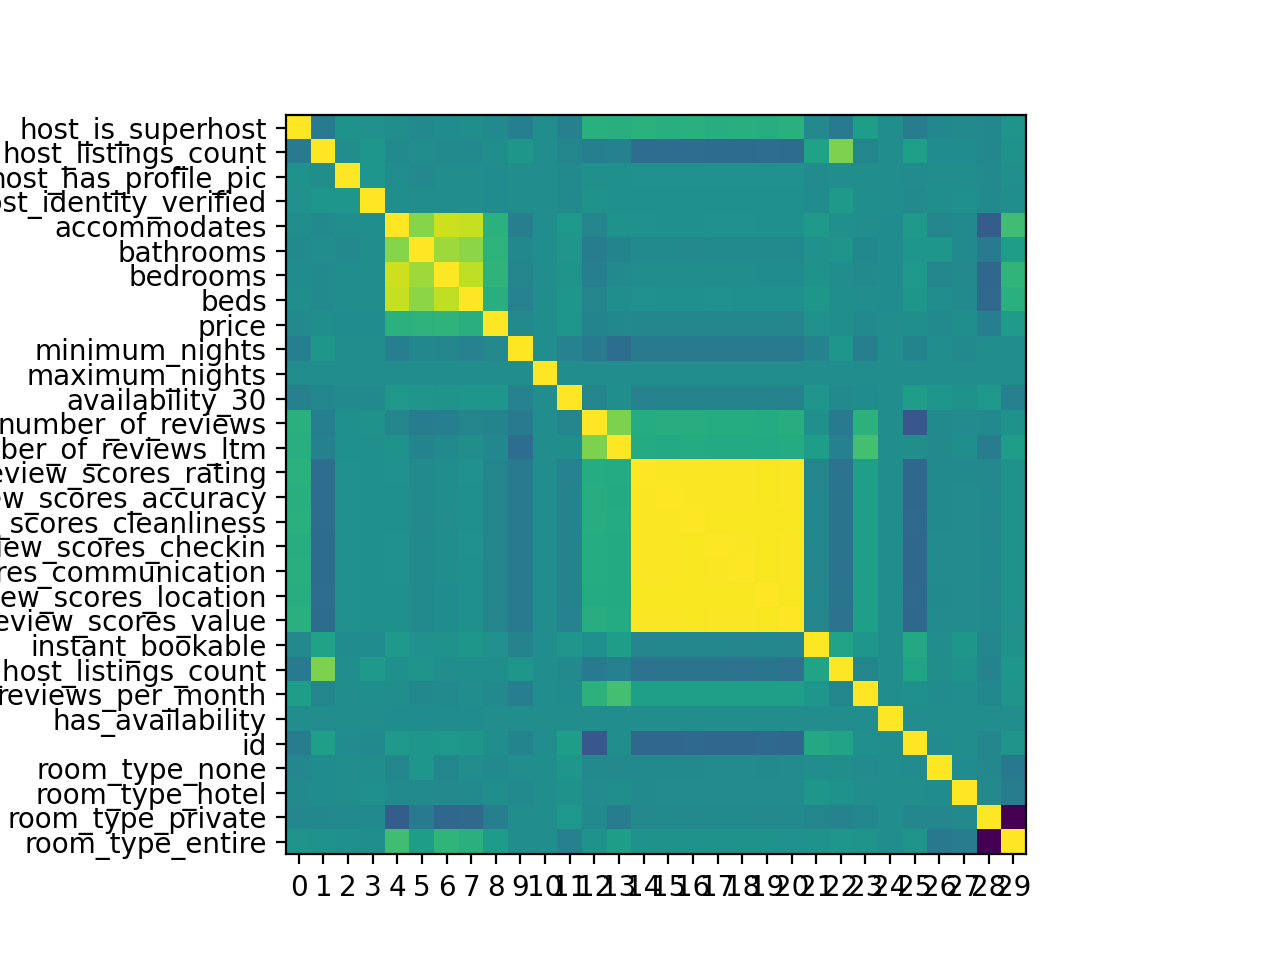

In [57]:
# now lets start looking at the data to get some future steps
corr_mat = np.corrcoef(np.array(numeric_data).T)
fig,ax = plt.subplots()
ax.set_xticks(np.arange(len(numeric_data.keys())))
ax.set_yticks(np.arange(len(numeric_data.keys())))
# ax.set_xticklabels(numeric_data.keys())
ax.set_yticklabels(numeric_data.keys())
ax.imshow(corr_mat)

In [58]:
# one glaring thing is that all the reviews are almost perfectly correlated, so I'm just going to
# take the mean of them and group them all into 'reviews'
reviews = ['review_scores_value', 'review_scores_rating',
           'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location']
numeric_data['reviews'] = numeric_data[reviews].mean(axis=1)
for review in reviews:
    numeric_data.drop(review,axis=1, inplace=True)

<IPython.core.display.Javascript object>


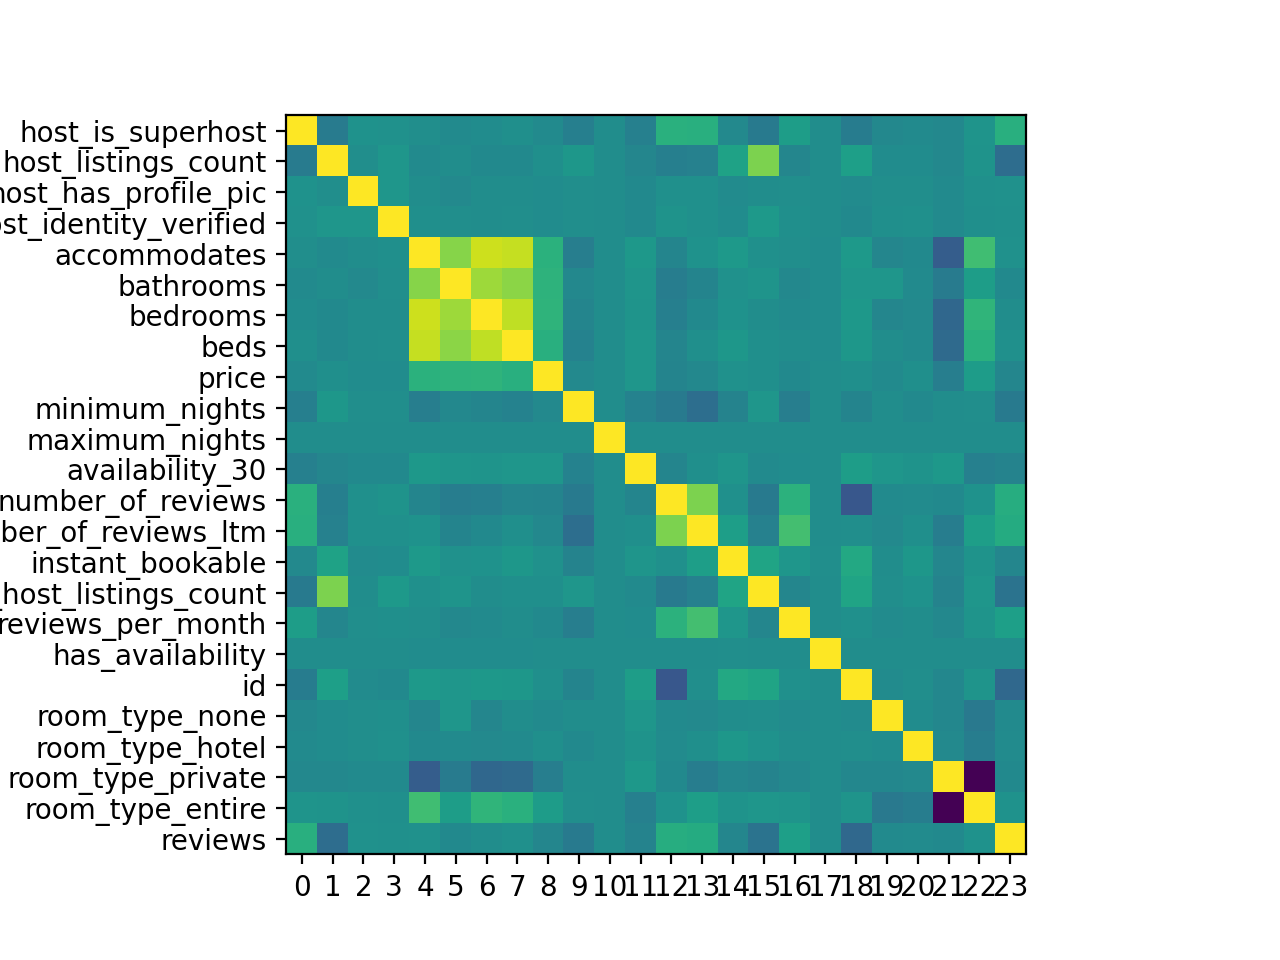

In [59]:
# lets look again at how correlated things are
corr_mat = np.corrcoef(np.array(numeric_data).T)
fig,ax = plt.subplots()
ax.set_xticks(np.arange(len(numeric_data.keys())))
ax.set_yticks(np.arange(len(numeric_data.keys())))
# ax.set_xticklabels(numeric_data.keys())
ax.set_yticklabels(numeric_data.keys())
ax.imshow(corr_mat)

In [70]:
# This looks better now, still some relatively high correlations between beds, bedrooms, bathrooms,
# and accomodates, but the highest is .83 so still a fair bit of independent information

# finally lets calculate our prediction variable which I'll call monthly income, this will 
# definitely be an imperfect measure of monthly income, but it will essentially be the number of
# non available days over the next 30 days times the price per day.

numeric_data['monthly_income'] = numeric_data['price'] * np.abs(numeric_data['availability_30'] - 30)

# first just try a simple linear regression without much more pre-processing of features
features = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
            'accommodates', 'bathrooms', 'bedrooms', 'beds',
            'maximum_nights',  'number_of_reviews', 
            'number_of_reviews_ltm', 'instant_bookable',
            'calculated_host_listings_count', 'reviews_per_month',
            'room_type_none', 'room_type_hotel', 'room_type_private', 'room_type_entire',
            'reviews']

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
regression = LinearRegression()
kfold = KFold(5, shuffle=False)
cv_scores = []
coefs = []

for train_idx,test_idx in kfold.split(numeric_data[features]):
    regression.fit(numeric_data[features].iloc[train_idx],numeric_data['price'].iloc[train_idx])
    r2=regression.score(numeric_data[features].iloc[test_idx],numeric_data['price'].iloc[test_idx])
    cv_scores.append(r2)
    coefs.append(regression.coef_)
    print(r2)
# ceiling is an r2 of .75 with the price information
# with shuffle=false on the kfold, we do much better, this currently has no location data so that is probably why unshuffled is better
# mean r2 of .25 with linear regression and a paired down set of regressors, pretty low starting
# point so lets see if we can do better in other files.

-0.031620159373777046
0.2600329703155313
0.29938481873328104
0.037194593177434454
0.17813851517519597


In [73]:
# let me just standardize the features and see if that helps at all
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(numeric_data[features])
cv_scores = []
coefs = []
for train_idx,test_idx in kfold.split(X):
    regression.fit(X[train_idx],numeric_data['monthly_income'].iloc[train_idx])
    r2=regression.score(X[test_idx],numeric_data['monthly_income'].iloc[test_idx])
    cv_scores.append(r2)
    coefs.append(regression.coef_)
# now that all the values are on the same scale, lets peek into the weights to see which seem most 
# important
coefs = np.mean(coefs, axis = 0)
for i in range(len(coefs)):
    print(features[i] + ' weight: {:1.3f}'.format(coefs[i]))

host_is_superhost weight: 255.384
host_has_profile_pic weight: 1109.433
host_identity_verified weight: -81.585
accommodates weight: -704.564
bathrooms weight: 73687.050
bedrooms weight: 25779.416
beds weight: 13595.620
maximum_nights weight: 700.714
number_of_reviews weight: 826.842
number_of_reviews_ltm weight: -15319.682
instant_bookable weight: 119.383
calculated_host_listings_count weight: 1261.339
reviews_per_month weight: -3898.808
room_type_none weight: -21350633133526360.000
room_type_hotel weight: -21350633133521484.000
room_type_private weight: -21350633133524080.000
room_type_entire weight: -21350633133522616.000
reviews weight: -363.066


In [75]:
# ok some things here make sense, like the strongest weights are on #beds and price, but some are weird,
# like bathrooms is strongly negtive, might be some nonlinear interactions here that would be better
# modeled another way.

# try a simple feed-forward NN to improve prediction
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X,numeric_data['monthly_income'], test_size = .2)
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(38, kernel_initializer='lecun_normal',input_dim = trainX.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(76, kernel_initializer='lecun_normal',activation='relu'))
NN_model.add(Dense(76, kernel_initializer='lecun_normal',activation='relu'))
# NN_model.add(Dense(76, kernel_initializer='lecun_normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='lecun_normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# train the model
NN_model.fit(trainX, trainY, epochs=20, batch_size=64)

# test it
NN_model.evaluate(testX, testY, batch_size=64)

from sklearn.metrics import r2_score

predictions = NN_model.predict(testX)
print(r2_score(predictions,testY))
# we get slightly better predictions using this pretty large NN than linear regression...
# but its only doing about 6 points better


# next I'm going to explore a few of the wordy columns to see if theres any promising information
# there

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 38)                722       
                                                                 
 dense_16 (Dense)            (None, 76)                2964      
                                                                 
 dense_17 (Dense)            (None, 76)                5852      
                                                                 
 dense_18 (Dense)            (None, 1)                 77        
                                                                 
Total params: 9,615
Trainable params: 9,615
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
96940/96940 [==============================] - 101s 1ms/step - loss: 2037.3347 - mean_absolute_error: 2037.3347
Epoch 2/20
96940/96940 [==============================] - 102

In [78]:
from itertools import permutations
len(list(permutations(range(3),3)))

6